In [1]:
# Multi Layer Perceptron with Decision Tree Feature Selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\dt_fs_train_data_2.csv")

In [4]:
damage_labels = [1, 2, 3]

In [5]:
#Finding minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [6]:
print(min_count)

25124


In [7]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [8]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,has_superstructure_timber,count_families,damage_grade
169766,22,1101,12242,2,10,5,6,t,r,n,f,q,s,0,1,0,0,0,1,1
195342,13,18,8307,1,20,5,3,t,r,n,f,j,s,0,1,0,0,1,1,1
186923,26,1216,298,2,20,12,4,t,r,n,f,q,s,0,1,0,0,0,1,1
210332,26,896,3221,2,0,7,7,t,u,n,v,x,s,0,0,0,0,0,1,1
232900,13,1310,202,2,0,8,4,t,r,q,f,q,s,0,1,0,0,0,1,1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])

In [11]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,has_superstructure_timber,count_families,damage_grade
169766,22,1101,12242,2,10,5,6,2,2,0,0,1,2,0,1,0,0,0,1,1
195342,13,18,8307,1,20,5,3,2,2,0,0,0,2,0,1,0,0,1,1,1
186923,26,1216,298,2,20,12,4,2,2,0,0,1,2,0,1,0,0,0,1,1
210332,26,896,3221,2,0,7,7,2,3,0,2,3,2,0,0,0,0,0,1,1
232900,13,1310,202,2,0,8,4,2,2,1,0,1,2,0,1,0,0,0,1,1


In [12]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,19].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [14]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.8716 - accuracy: 0.5801 - val_loss: 0.8352 - val_accuracy: 0.5984
Epoch 2/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.8229 - accuracy: 0.6017 - val_loss: 0.8230 - val_accuracy: 0.6086
Epoch 3/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.7991 - accuracy: 0.6152 - val_loss: 0.7932 - val_accuracy: 0.6242
Epoch 4/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.7731 - accuracy: 0.6327 - val_loss: 0.7768 - val_accuracy: 0.6287
Epoch 5/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.7581 - accuracy: 0.6405 - val_loss: 0.7747 - val_accuracy: 0.6401
Epoch 6/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.7492 - accuracy: 0.6439 - val_loss: 0.7650 - val_accuracy: 0.6387
Epoch 7/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.7436 - accuracy: 0.6485 - val_loss: 0.7621 - val_accuracy:

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

472/472 [==============================] - 0s 824us/step - loss: 0.7545 - accuracy: 0.6460
Test accuracy: 0.6460365056991577


In [18]:
y_pred = model.predict(X_test)

472/472 [==============================] - 0s 711us/step


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           1       0.74      0.78      0.76      5023
           2       0.52      0.54      0.53      5008
           3       0.68      0.62      0.64      5044

    accuracy                           0.65     15075
   macro avg       0.65      0.65      0.65     15075
weighted avg       0.65      0.65      0.65     15075



In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']


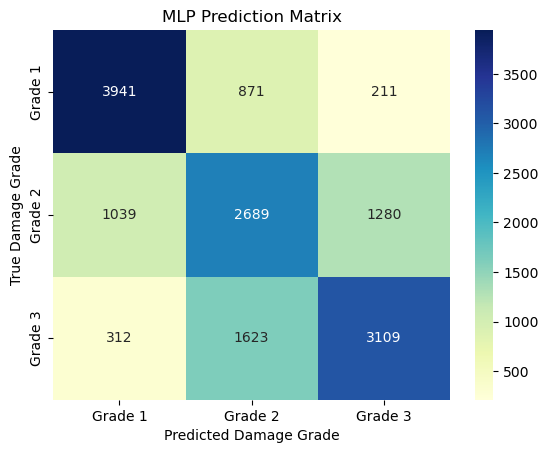

In [21]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
plt.title("MLP Prediction Matrix")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()